<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/ejemplo-basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [7]:
# Datos de muestra
age = np.array([25, 30, 35, 40, 45])
height = np.array([175, 180, 185, 165, 170])
weight = np.array([70, 80, 75, 65, 72])

# Estandarización de los datos
age_std = (age - np.mean(age)) / np.std(age)
height_std = (height - np.mean(height)) / np.std(height)
weight_std = (weight - np.mean(weight)) / np.std(weight)
height_std

array([ 0.        ,  0.70710678,  1.41421356, -1.41421356, -0.70710678])

In [9]:
# Creación de una matriz de datos estandarizados
X_std = np.column_stack((age_std, height_std, weight_std))

# Cálculo de la matriz de covarianza
cov_matrix = np.cov(X_std.T)
cov_matrix

array([[ 1.25      , -0.625     , -0.38859798],
       [-0.625     ,  1.25      ,  0.98915848],
       [-0.38859798,  0.98915848,  1.25      ]])

In [12]:
# Descomposición propia
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
eigen_vecs

array([[ 0.46701267, -0.85860045, -0.21143426],
       [-0.64823991, -0.16980773, -0.7422603 ],
       [-0.60140185, -0.48370509,  0.63588144]])

In [13]:
eigen_vals

array([2.61795752, 0.90746972, 0.22457276])

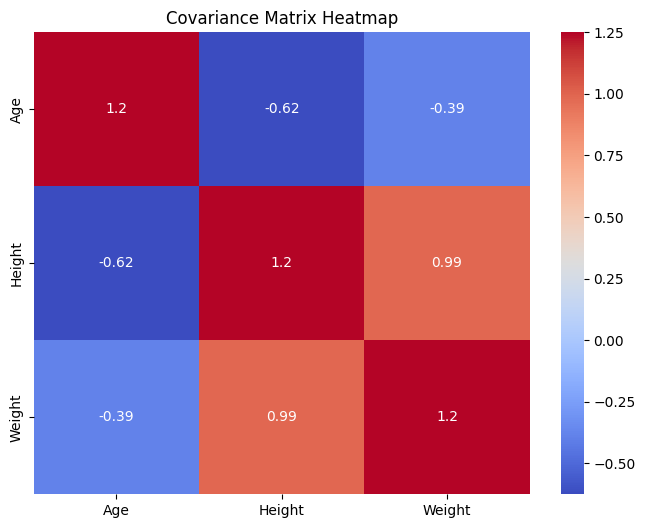

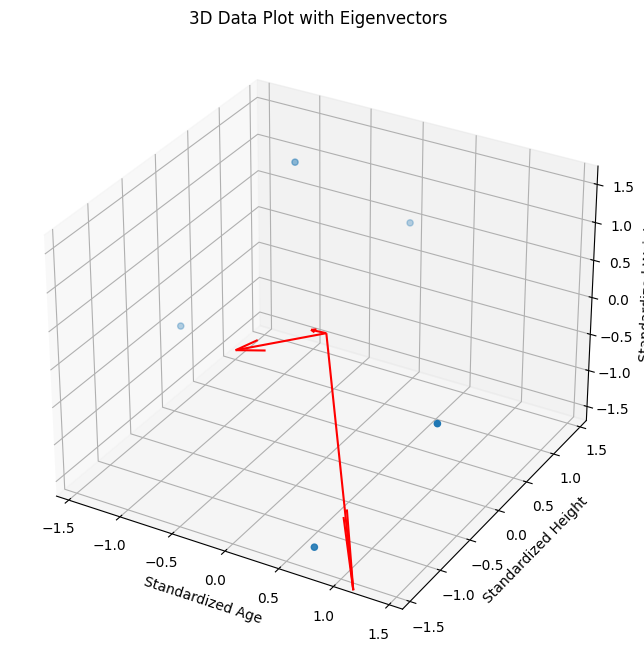

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Covariance Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=['Age', 'Height', 'Weight'], yticklabels=['Age', 'Height', 'Weight'])
plt.title('Covariance Matrix Heatmap')
plt.show()

# 3D Data Plot with Eigenvectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age_std, height_std, weight_std)

# Adding eigenvectors to the 3D plot
for i in range(len(eigen_vals)):
    vec = eigen_vecs[:,i] * eigen_vals[i]
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='r')

ax.set_xlabel('Standardized Age')
ax.set_ylabel('Standardized Height')
ax.set_zlabel('Standardized Weight')
plt.title('3D Data Plot with Eigenvectors')
plt.show()